# PROBLEM STATEMENT 

## 1.Business Understanding

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. 

### Objective


Predict the overall risk of heart disease using logistic regression

### Variables:


Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.  


**Demographic**:

• Sex: male or female(Nominal)   
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)  

**Behavioral**

• Current Smoker: whether or not the patient is a current smoker (Nominal)  
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)  

**Medical( history)**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)  
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)  
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)  
• Diabetes: whether or not the patient had diabetes (Nominal)  

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)  
• Sys BP: systolic blood pressure (Continuous)  
• Dia BP: diastolic blood pressure (Continuous)  
• BMI: Body Mass Index (Continuous)  
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)  
• Glucose: glucose level (Continuous)  

**Predict variable (desired target)**

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)  

### Import Libraries

In [128]:
import matplotlib.pyplot as plt #  for plotting
import seaborn as sns # for interactive plotting with colors /used for plot interactive graph. I like it most for plot
import numpy as np # for numerical calculation
import pandas as pd # for data manipulation,data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression # For building machine learning clasification model
from sklearn.model_selection import train_test_split # to split arrays or matrices into random train and test subsets
from sklearn.model_selection import GridSearchCV # to fine tune the parameters of your model
from tpot import TPOTClassifier #  genetic search algorithm to find the best parameters and model ensembles
from sklearn.metrics import roc_auc_score # Compute Area Under the Receiver Operating Characteristic Curve from prediction scores.
from sklearn.pipeline import Pipeline # to assemble several steps that can be cross-validated together while setting different parameters
from sklearn.preprocessing import MinMaxScaler # Transform features by scaling each feature to a given range.
from sklearn.preprocessing import OneHotEncoder # Encode categorical features as a one-hot numeric array
from sklearn.compose import ColumnTransformer # Applies transformers to columns of an array or pandas DataFrame
import pickle # Pickle is used for serializing and de-serializing a Python object structure
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

### Load Dataset

In [5]:
data = pd.read_csv('framingham.csv')

In [6]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## 2.Data Understanding

In [9]:
#previewing the dimensions or shape (rows and columns)of the data

data.shape

(4238, 16)

In [11]:
#previewing the information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [12]:
#Checking for duplicate values

data.duplicated().sum()

0

In [14]:
#previewing the summary numerical statistics of our data

data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [16]:
#previewing both numerical and categorical statistics

data.describe(include="all")

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<AxesSubplot:>

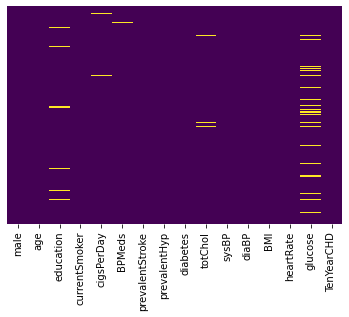

In [15]:
#Checking for missing values in our data

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

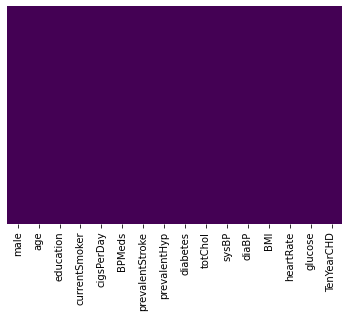

In [19]:
 # Removing rows with null values
    
data.dropna(inplace = True)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## 3. Data Visualization

### I.Univariate analysis

#### Male

<AxesSubplot:xlabel='male', ylabel='count'>

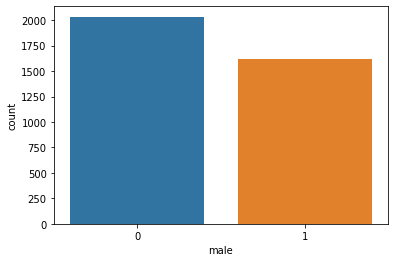

In [20]:
sns.countplot(data=data,x='male')

#### Age

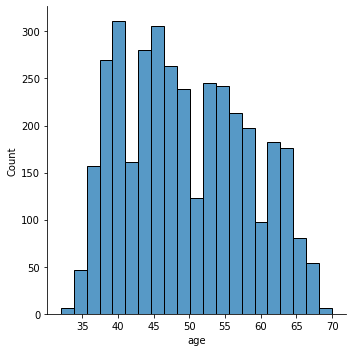

In [23]:
sns.displot(data=data,x='age')

#### Education

<AxesSubplot:xlabel='education', ylabel='count'>

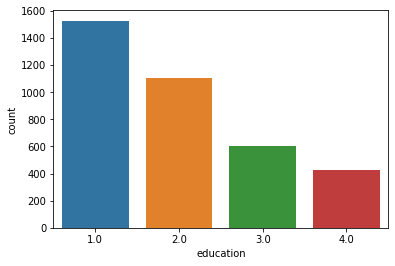

In [25]:
sns.countplot(data=data,x='education')

#### Current Smoker

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

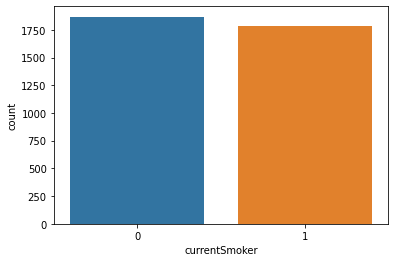

In [28]:
sns.countplot(data=data,x='currentSmoker')

#### BPMeds

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

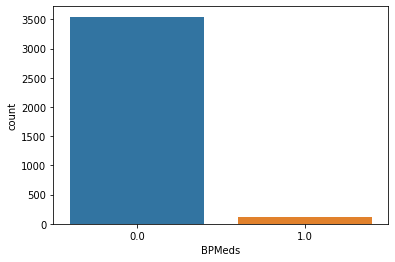

In [30]:
sns.countplot(data=data,x='BPMeds')

#### Prevalent Stroke

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

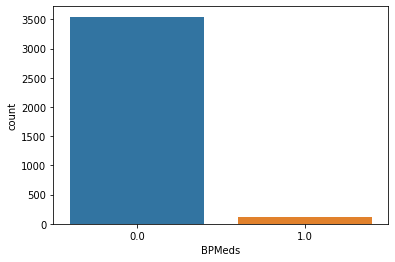

In [32]:
sns.countplot(data=data,x='BPMeds')

#### PrevalentHyp

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

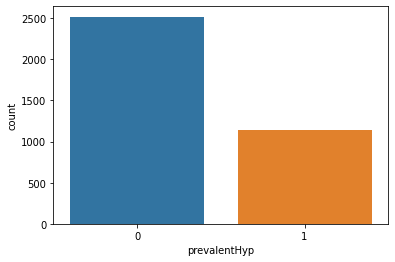

In [33]:
sns.countplot(data=data,x='prevalentHyp')

#### Diabetes

<AxesSubplot:xlabel='diabetes', ylabel='count'>

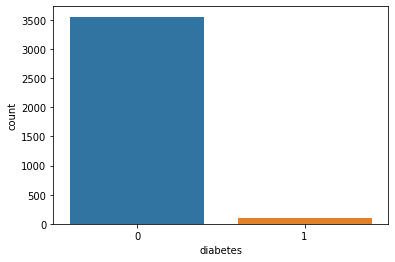

In [34]:
sns.countplot(data=data,x='diabetes')

#### totChol

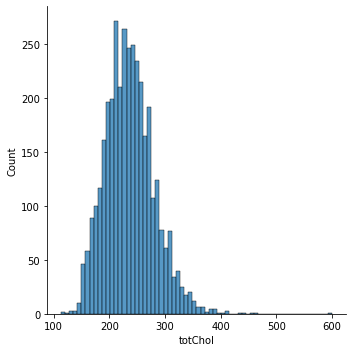

In [36]:
sns.displot(data=data,x='totChol')

#### sysBP

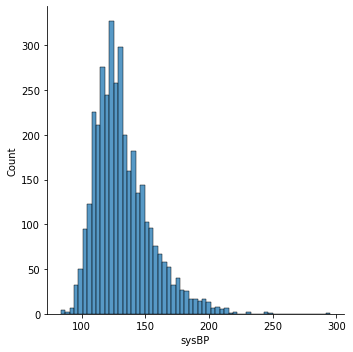

In [43]:
sns.displot(data=data,x='sysBP')

#### diaBP

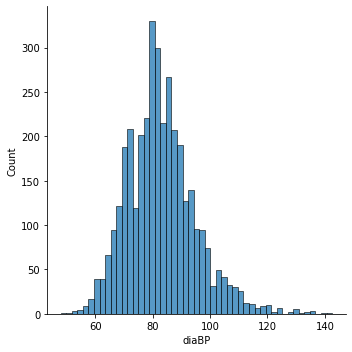

In [48]:
sns.displot(data=data,x='diaBP')

#### BMI

<AxesSubplot:ylabel='BMI'>

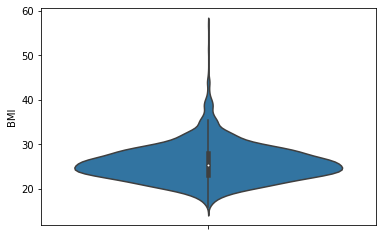

In [56]:
sns.violinplot(data=data,y='BMI')

#### Heart Rate

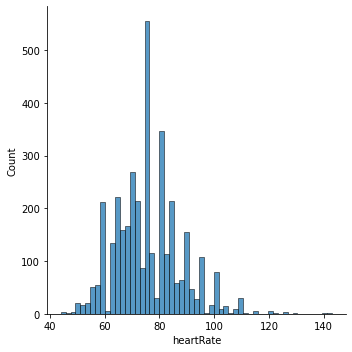

In [57]:
sns.displot(data=data,x='heartRate')

#### glucose	

<AxesSubplot:xlabel='glucose'>

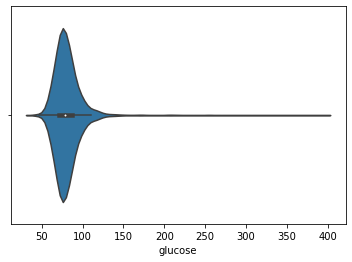

In [64]:
sns.violinplot(data=data,x='glucose')

#### TenYearCHD

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

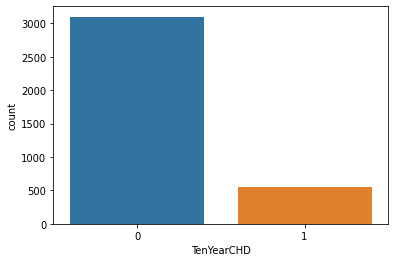

In [65]:
sns.countplot(data=data,x='TenYearCHD')

In [66]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### II.Bivariate analysis

#### Male vs TenYearCHD

<AxesSubplot:xlabel='male', ylabel='count'>

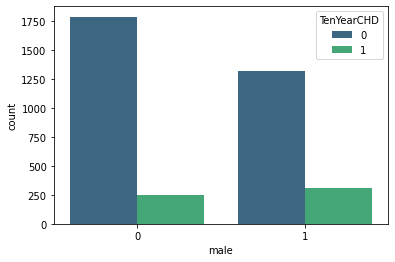

In [90]:
sns.countplot(data=data,x='male',hue='TenYearCHD',palette='viridis')

#### Current smoker vs TenYearCHD

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

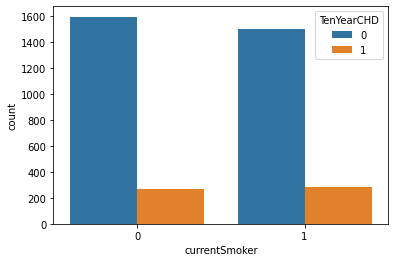

In [91]:
sns.countplot(data=data,x='currentSmoker',hue='TenYearCHD')

#### Diabetes vs TenYearCHD

<AxesSubplot:xlabel='diabetes', ylabel='count'>

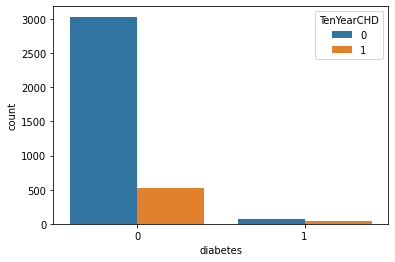

In [92]:
sns.countplot(data=data,x='diabetes',hue='TenYearCHD')

### III.Multivariate analysis

####  Diabetes vs totchol with TenYearCHD as hue

<AxesSubplot:xlabel='diabetes', ylabel='totChol'>

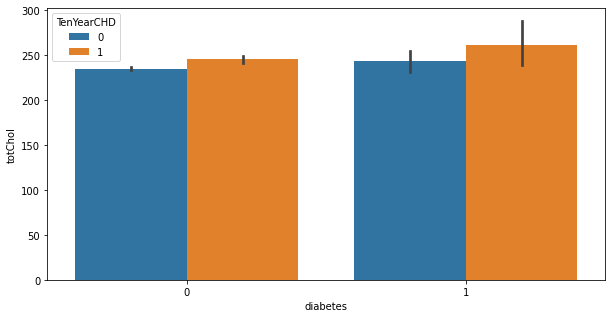

In [98]:
plt.figure(figsize=(10,5))

sns.barplot(data=data,x='diabetes',y='totChol',hue='TenYearCHD')

####  Diabetes vs glucose with TenYearCHD as hue

<AxesSubplot:xlabel='diabetes', ylabel='glucose'>

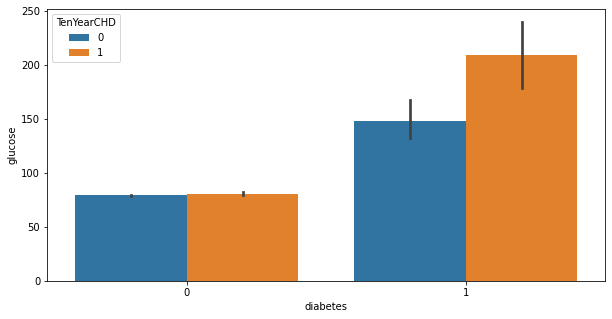

In [100]:
plt.figure(figsize=(10,5))

sns.barplot(data=data,x='diabetes',y='glucose',hue='TenYearCHD')

## 4.Data Preproccessing and Feature Engineering

### Correlation

<AxesSubplot:>

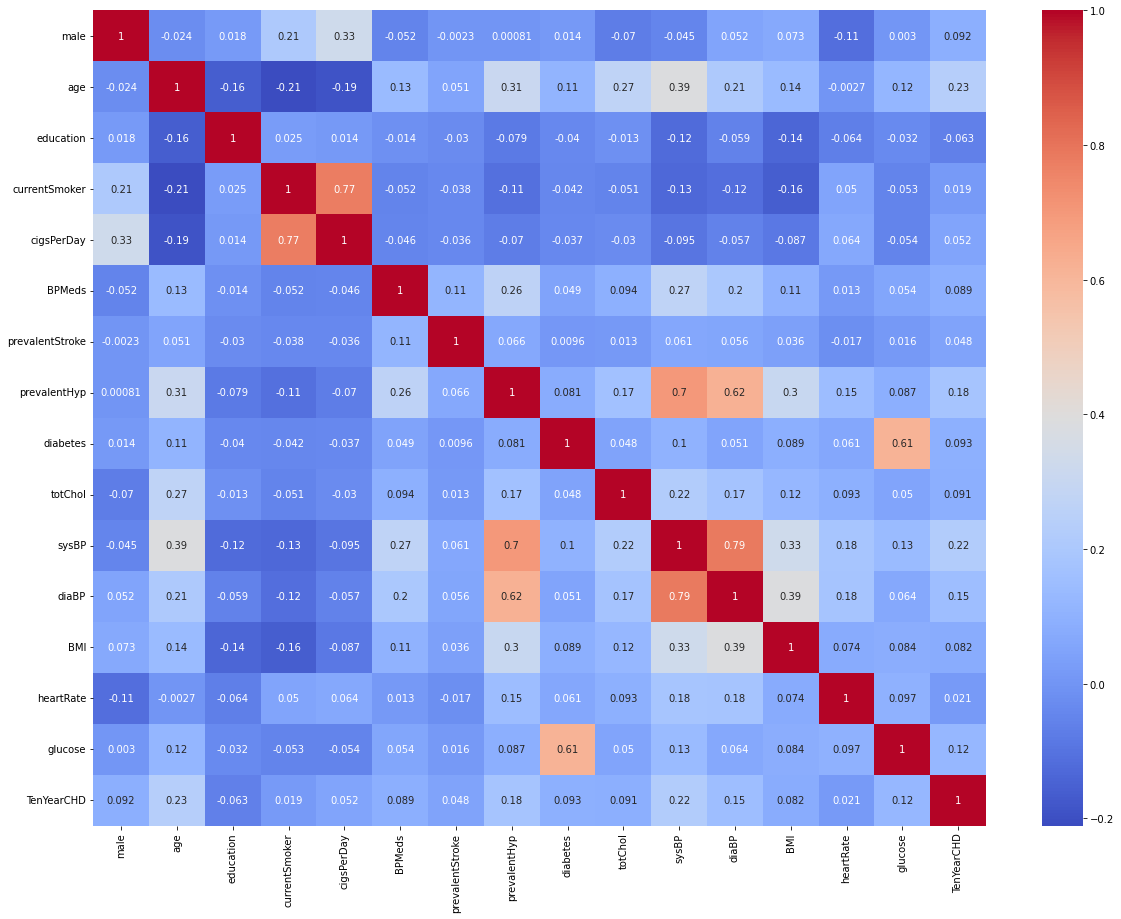

In [102]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [104]:
#Rename TenYearCHD to target

data.rename(columns = {'TenYearCHD':'target' }, inplace=True)

In [105]:
#Checking the ratio of 0 and 1 in our target column

data['target'].value_counts(normalize=True).round(3)

0    0.848
1    0.152
Name: target, dtype: float64

### defining predictor variables and target variable

In [106]:
#Dependent variable is also referred as target variable and the independent variables are called the predictors.

X = data.drop('target',axis=1)
y = data['target']

### splitting data into train and test set

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42,stratify=y)

### Selecting model using TPOT

In [111]:
# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)

In [112]:
tpot.fit(X_train, y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7182210207693426

Generation 2 - Current best internal CV score: 0.7182210207693426

Generation 3 - Current best internal CV score: 0.7295767365505244

Generation 4 - Current best internal CV score: 0.7295767365505244

Generation 5 - Current best internal CV score: 0.7295767365505244

Best pipeline: LogisticRegression(RobustScaler(input_matrix), C=5.0, dual=False, penalty=l2)

AUC score: 0.7440

Best pipeline steps:
1. RobustScaler()
2. LogisticRegression(C=5.0, random_state=42)


### Pipeline

#### scale columns

In [115]:
#numerical columns

numerical_pipe = Pipeline([('scaler', MinMaxScaler()),])

In [116]:
#categorical coulumns

categorical_pipe = Pipeline([('encoder',OneHotEncoder()),])

In [117]:
#preproccesor

preprocessor = ColumnTransformer([
    ("numeric", numerical_pipe, list(X_train.drop(columns=["male", "currentSmoker", "BPMeds", 
                                                           "prevalentStroke", "prevalentHyp", 
                                                           "diabetes"]).columns)),
    ("categoric", categorical_pipe, ["male", "currentSmoker", "BPMeds", 
                                     "prevalentStroke", "prevalentHyp", 
                                     "diabetes"])
])

In [118]:
#pipeline

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(n_jobs=-1, random_state=42))
])

In [119]:
#parameter

parameter = {
    "model__max_iter": [50, 100, 150]
}

## 5.Evaluation

In [124]:
#appliying gridsearch to fine tune the parameters of our model

model = GridSearchCV(pipeline, param_grid=parameter, cv=3, n_jobs=-1, verbose=1)

In [125]:
#fitting our model to the data

model.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'education',
                                                                          'cigsPerDay',
                                                                          'totChol',
                                                                          'sysBP',
                                                                          'diaBP',
                                                                          'BMI',
                                            

In [126]:
# checking for accuracy of our model

print(f"model train score: {model.score(X_train, y_train)},\n" 
      f"model test score: {model.score(X_test, y_test)},\n" 
      f"model best score: {model.best_score_}")

model train score: 0.8522975929978118,
model test score: 0.862144420131291,
model best score: 0.8471918307804523


## 6.Deploying

In [129]:
# saving model

filename = 'finalized_model.sav'
pickle.dump(model,open(filename,'wb'))

In [156]:
#Loading model

loaded_model = pickle.load(open(filename, 'rb'))


In [ ]:
#storing prediction in result in variable

result = loaded_model.predict(data.sample())


In [158]:
# 0 No
# 1 yes 

result[0]

1